In [1]:
from given_kalman import KalmanFilter as GivenFilter
import numpy as np
import matplotlib.pyplot as plt

First we will test the out-of-the-box cv2 KalmanFilter (with the wrapper from pysource) for a baseline.

In [2]:
kf2 = GivenFilter()
kf2

In [3]:
kf2.predict((10,10))
kf2.predict((20,40))
kf2.predict((30,90))
kf2.predict((40,160))
kf2.predict((50,250))

(60, 311)

Next, we will test our kalman filter.

## Test 1: Perfect Line

In [4]:
from kalman import KalmanFilter

In [5]:
# Initializing empty kalman filter object with predetermined transition matrix, covariance matrix, and measurement uncertainty
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)

# Giving seed observations to the kalman filter
kf.run((1,1))
kf.run((1,2))
kf.run((1,3))
kf.run((1,4))
kf.run((1,5))

/home/conor/Homework/csci4831/yolo-hand-detection/kalman/kalman.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [0, 0, 0, t**2/2, t, 1]


(0.9898631244711572, 6.019479266455075)

This is good, as it's close to (1,6) which follows this linear pattern.

## Test 2: Perfect Quadratic with Dropped Data

In [6]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)

# analyzing predicted position data with randomly ommitted datapoints vs ground truth of (x, x^2) plot.
a = np.empty(20, dtype='object')
for i in range(1,21):
    if np.random.random() < .4:
        print(i)
        a[i-1] = kf.run((1,i**2))
    else:
        print("DROPPED", i)
        a[i-1] = kf.run((1, (i-1)**2))
a

DROPPED 1
DROPPED 2
DROPPED 3
DROPPED 4
5
6
7
DROPPED 8
DROPPED 9
10
11
12
13
14
15
16
DROPPED 17
DROPPED 18
DROPPED 19
20


array([(0.9823182711198427, 0.0),
       (1.0238198566040968, 2.3471452234983468),
       (0.9884185056270642, 8.700866065274363),
       (0.988121006811272, 15.91470356362943),
       (0.9898631244711572, 41.012935435579756),
       (0.9913528301195057, 55.1331699630027),
       (0.9925053359301346, 69.12928196864274),
       (0.9934011523896566, 68.10644671964835),
       (0.9941113364884554, 78.45652473624702),
       (0.9946860374945214, 111.85938750918349),
       (0.995159777781529, 141.39100931735464),
       (0.9955566169490051, 169.8586839274857),
       (0.9958936780187261, 198.66076492019263),
       (0.9961834186735365, 228.53167275683916),
       (0.9964350930281066, 259.8734959392129),
       (0.9966557072482388, 292.9136332784859),
       (0.9968506571342807, 310.3282285438098),
       (0.9970241625719154, 334.4653468466436),
       (0.9971795696323122, 363.87075435301205),
       (0.9973195646603403, 415.1072615902129)], dtype=object)

Despite the high number of dropped datapoints, our KalmanFilter remains greater than 90% accurate to the ground truth position, however, it does not make up for innaccurate predictions due to missing data without the introduction of more stable data towards the end of the simulation.

In [7]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)
for i in range(1,21):
    if np.random.random() < .6:
        print(kf.run((1,i**2)))
    else:
        print("DROPPED", end="")
        print(kf.predict())

(0.9823182711198427, 0.9823182711198427)
DROPPED(0.9823182711198427, 0.9823182711198427)
(1.0153632056627588, 15.966360256635312)
(0.9957150529944502, 25.03258497132925)
(0.9942128016033132, 36.01976960428442)
DROPPED(0.9849312246950495, 49.043100895368354)
DROPPED(0.9717842055725097, 64.0728156351308)
(0.9950092165252015, 81.00507421315966)
DROPPED(0.9889660626064513, 100.009272266974)
(0.9941268570191426, 121.0033522874532)
DROPPED(0.9889670733448838, 144.0054022107819)
DROPPED(0.9826979132586942, 169.0076814890455)
DROPPED(0.9753193767605739, 196.01019012224396)
(0.995454190005303, 225.00111037483455)
DROPPED(0.9924881261255875, 256.0013398211637)
(0.9957121699136832, 289.0003469789009)
(0.9960967538616187, 324.0000199719234)
DROPPED(0.9939050782465252, 360.99981669400137)
DROPPED(0.9914228594696501, 399.99955218086416)
(0.9957093872260029, 440.9995950034824)


Here it is easier to see that with fewer missing measurements (still with perfectly accurate data when present, however), our Kalman Filter is greater than 99.5% accurate.

In [8]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)
for i in range(-10,11):
    if i != 4:
        print(kf.run((i,i**2)))
    else:
        print("DROPPED", end="")
        print(kf.predict())

(-9.823182711198427, 98.23182711198427)
(-7.8910533425426195, 57.786226413941066)
(-6.753894933462457, 44.93691417181708)
(-5.826498847791171, 33.63257983832563)
(-4.869015102727654, 23.358883663645962)
(-3.895005092045531, 14.747087231221737)
(-2.9123778694626656, 7.986844115617029)
(-1.9247917763281657, 3.1493419055469243)
(-0.9341050053987792, 0.26670769493512836)
(0.05864751606664387, -0.6445382085977034)
(1.0528452540940452, 0.42494532504038035)
(2.0480938124032715, 3.480832347726139)
(3.044130542353638, 8.526767227616862)
(4.040773745735859, 15.56519752309231)
DROPPED(5.062333897542155, 24.337202980910654)
(6.040529916221871, 35.570768876107486)
(7.033451736897834, 48.647174803698256)
(8.03027138704261, 63.681897083738264)
(9.028495106769205, 80.70152101986079)
(10.027277200887053, 99.71506387240629)
(11.026282133997512, 120.72611037387303)


## Test 3: Line with Gaussian Noise

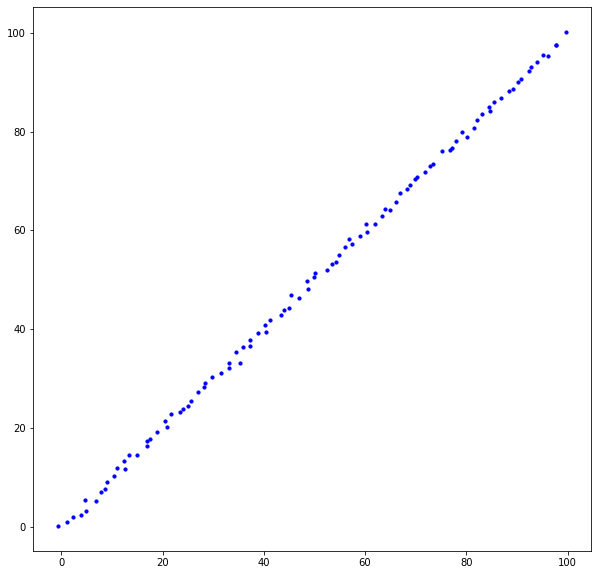

In [9]:
xs = np.arange(100)
ys = np.arange(100)

og_x = xs.copy()
og_y = ys.copy()

np.random.seed(4831)
xs = xs + np.random.randn(len(xs))/2
ys = ys + np.random.randn(len(ys))/2

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', s=10)
plt.show()

This is what the line looks like with some amount of noise.

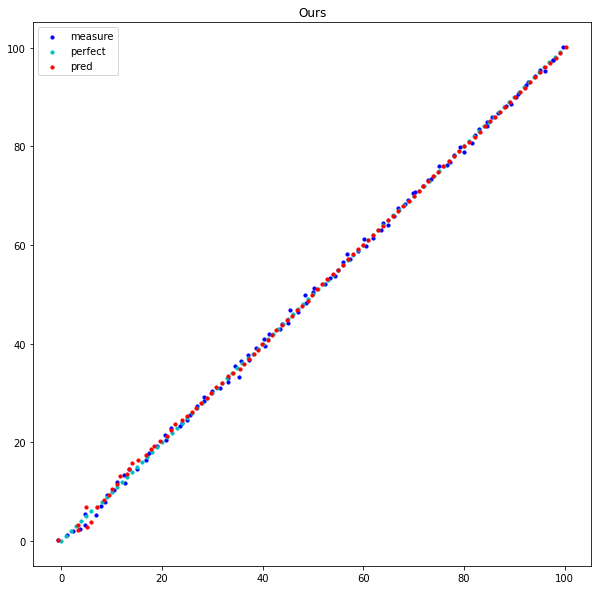

In [10]:
# initialize as we do in run_kalman.py
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

xhs = np.zeros(len(xs))
yhs = np.zeros(len(ys))

for i, (x, y) in enumerate(list(zip(xs, ys))):
    z = np.array([x, y])
    kf.run(z)
    xh, yh = kf.x[0], kf.x[3]
    xhs[i] = xh
    yhs[i] = yh
    if i==0:
        plt.scatter(xh, yh, color='r', label='pred', s=10)
    else:
        plt.scatter(xh, yh, color='r', s=10)
        
# kf.predict()
        
plt.title('Ours')
plt.legend()
plt.show()

Our results with the Kalman filter.

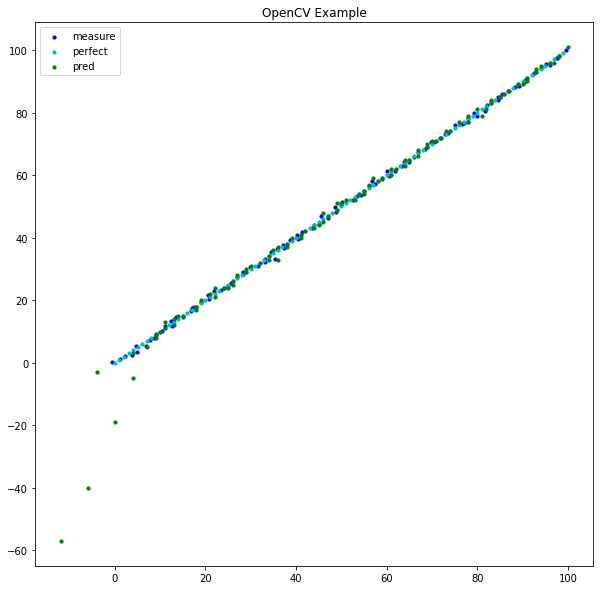

In [11]:
kf2 = GivenFilter()

xh2s = np.zeros(len(xs))
yh2s = np.zeros(len(ys))

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

for i, (x, y) in enumerate(list(zip(xs, ys))):
    xh2, yh2 = kf2.predict([x, y])
    xh2s[i] = xh2
    yh2s[i] = yh2
    if i==0:
        plt.scatter(xh2, yh2, color='g', label='pred', s=10)
    else:
        plt.scatter(xh2, yh2, color='g', s=10)
plt.legend()
plt.title('OpenCV Example')
plt.show()

The given Kalman filter results.

## Test 4: Parabola with Noise

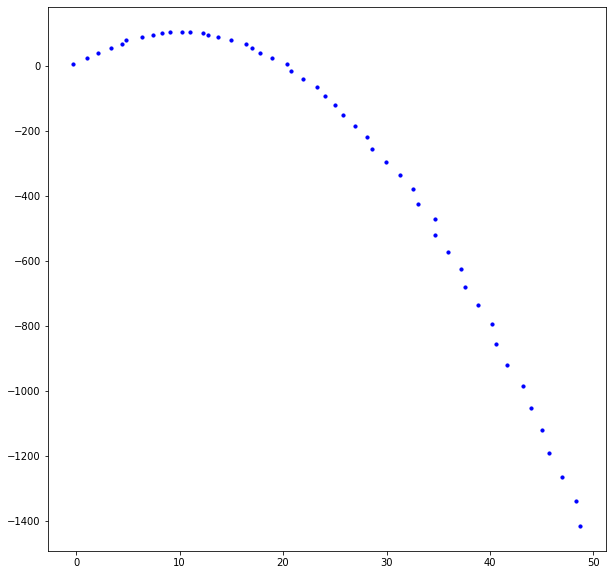

In [12]:
def parab(x, a, b, c):
    return a*x**2 + b*x + c

xs = np.arange(50)
ys = np.array([parab(x, -1, 20, 4) for x in xs])

og_x = xs.copy()
og_y = ys.copy()

np.random.seed(4831)
xs = xs + np.random.randn(len(xs))/4
ys = ys + np.random.randn(len(ys))/4

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', s=10)
plt.show()

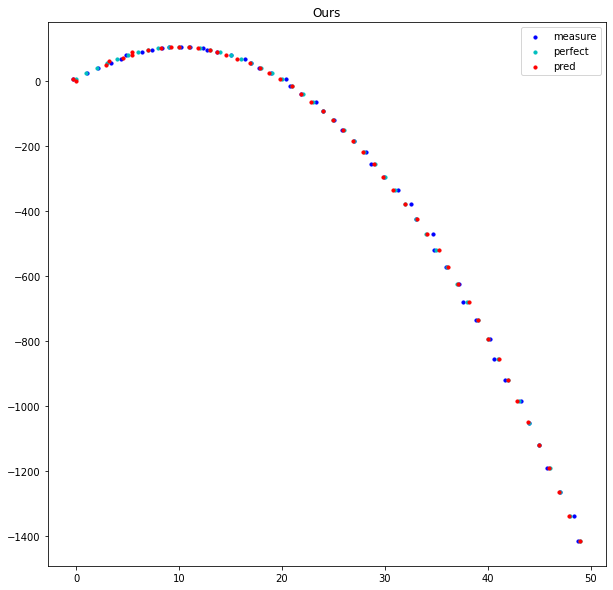

In [13]:
# initialize as we do in run_kalman.py
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

xhs = np.zeros(len(xs))
yhs = np.zeros(len(ys))

for i, (x, y) in enumerate(list(zip(xs, ys))):
    xh, yh = kf.x[0], kf.x[3]
    xhs[i] = xh
    yhs[i] = yh
    z = np.array([x, y])
    kf.run(z)
    if i==0:
        plt.scatter(xh, yh, color='r', label='pred', s=10)
    else:
        plt.scatter(xh, yh, color='r', s=10)
        
plt.title('Ours')
plt.legend()
plt.show()

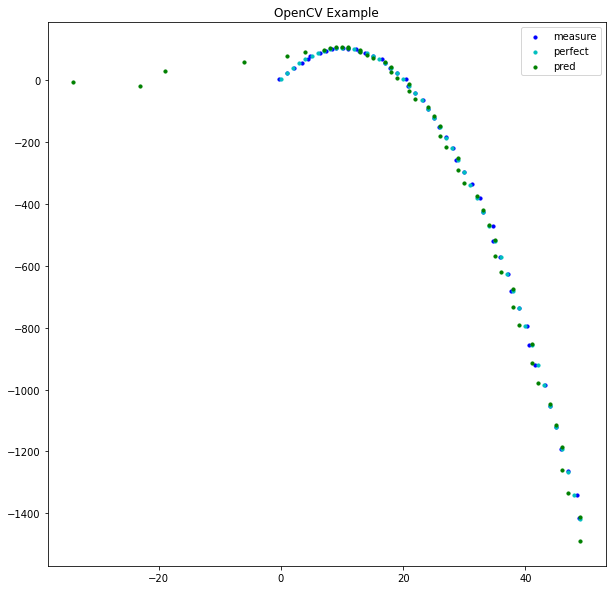

In [14]:
kf2 = GivenFilter()

xh2s = np.zeros(len(xs))
yh2s = np.zeros(len(ys))

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

for i, (x, y) in enumerate(list(zip(xs, ys))):
    xh2, yh2 = kf2.predict([x, y])
    xh2s[i] = xh2
    yh2s[i] = yh2
    if i==0:
        plt.scatter(xh2, yh2, color='g', label='pred', s=10)
    else:
        plt.scatter(xh2, yh2, color='g', s=10)
plt.legend()
plt.title('OpenCV Example')
plt.show()

Our Kalman filter is also doing a better job at following the synthetic parabola.